In [ ]:
# Import the Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Load the dataset
from google.colab import files

uploaded = files.upload()
import pandas as pd

df = pd.read_csv("heart.csv")



Saving heart.csv to heart (6).csv


In [ ]:
# Display the first 5 rows of the data
display(df. head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Display the last 5 rows of the data
display(df.tail())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# return the number of rows and columns in dataset
print("Shape:", df.shape)

Shape: (1025, 14)


In [ ]:
# shows the data type of each column
print("\nColumns and types:\n")
print(df.dtypes)



Columns and types:

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
# print missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
le_cp = LabelEncoder()
le_slope = LabelEncoder()

# Apply LabelEncoder to 'cp' and 'slope'
df['cp_encoded'] = le_cp.fit_transform(df['cp'])
df['slope_encoded'] = le_slope.fit_transform(df['slope'])

# Print the names of new label-encoded columns
print("New Label Encoded Columns:", ['cp_encoded', 'slope_encoded'])


New Label Encoded Columns: ['cp_encoded', 'slope_encoded']


In [ ]:
import pandas as pd

# One-Hot Encode 'restecg', 'ca', and 'thal'
df = pd.get_dummies(df, columns=['restecg', 'ca', 'thal'],
                            prefix=['restecg', 'ca', 'thal'],
                            drop_first=True)

# Show new encoded columns
print("New One-Hot Encoded Columns:", [col for col in df.columns if col.startswith("restecg_")
                or col.startswith("ca_")
                or col.startswith("thal_")])


One-Hot Encoded columns: ['restecg_1', 'restecg_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3']


In [ ]:
# View the first five rows of all encoded columns

# Combine label-encoded and one-hot encoded columns
encoded_cols = ['cp_encoded', 'slope_encoded'] + \
               [col for col in df.columns if col.startswith("restecg_")
                or col.startswith("ca_")
                or col.startswith("thal_")]

# Display only the encoded columns
df[encoded_cols].head()


,cp_encoded,slope_encoded,restecg_1,restecg_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0,2,True,False,False,True,False,False,False,False,True
1,0,0,False,False,False,False,False,False,False,False,True
2,0,0,True,False,False,False,False,False,False,False,True
3,0,2,True,False,True,False,False,False,False,False,True
4,0,1,True,False,False,False,True,False,False,True,False


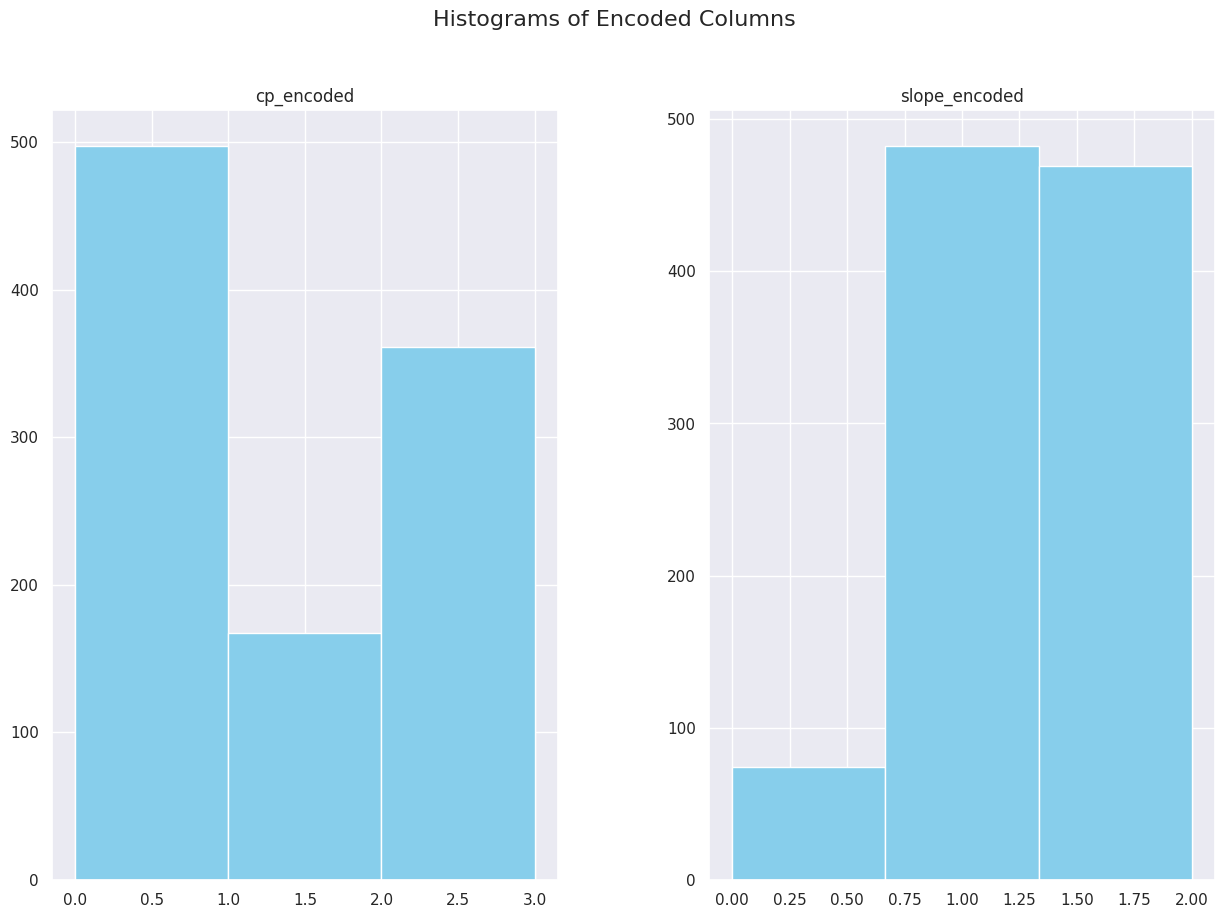

In [ ]:
# Histograms
df[encoded_cols].hist(figsize=(15,10), bins=3, color='skyblue')
plt.suptitle("Histograms of Encoded Columns", fontsize=16)
plt.show()

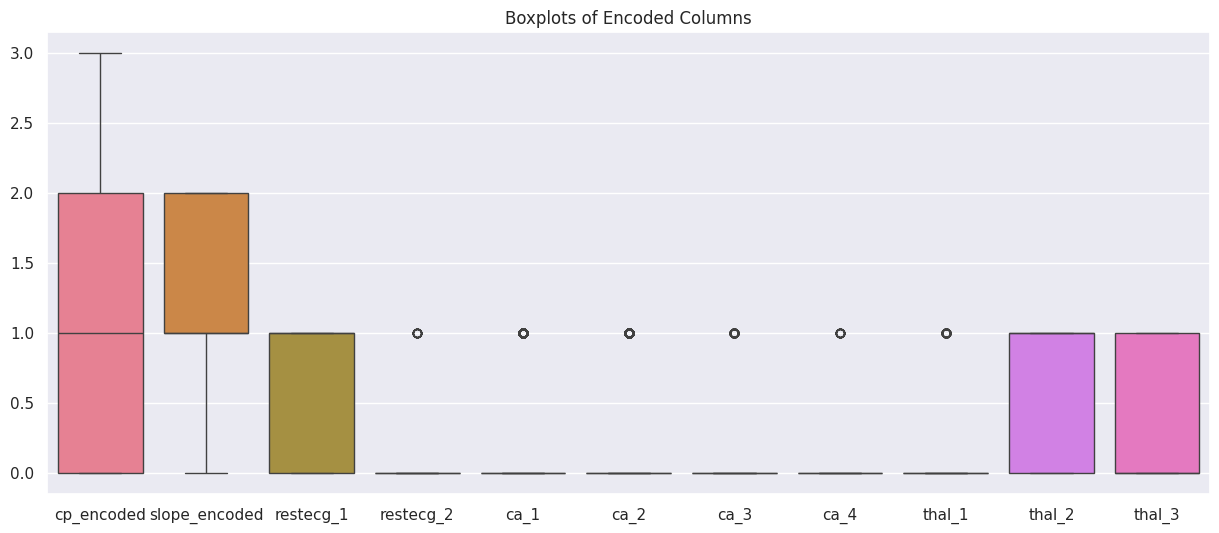

In [ ]:
# Boxplots
plt.figure(figsize=(15,6))
sns.boxplot(data=df[encoded_cols])
plt.title("Boxplots of Encoded Columns")
plt.show()

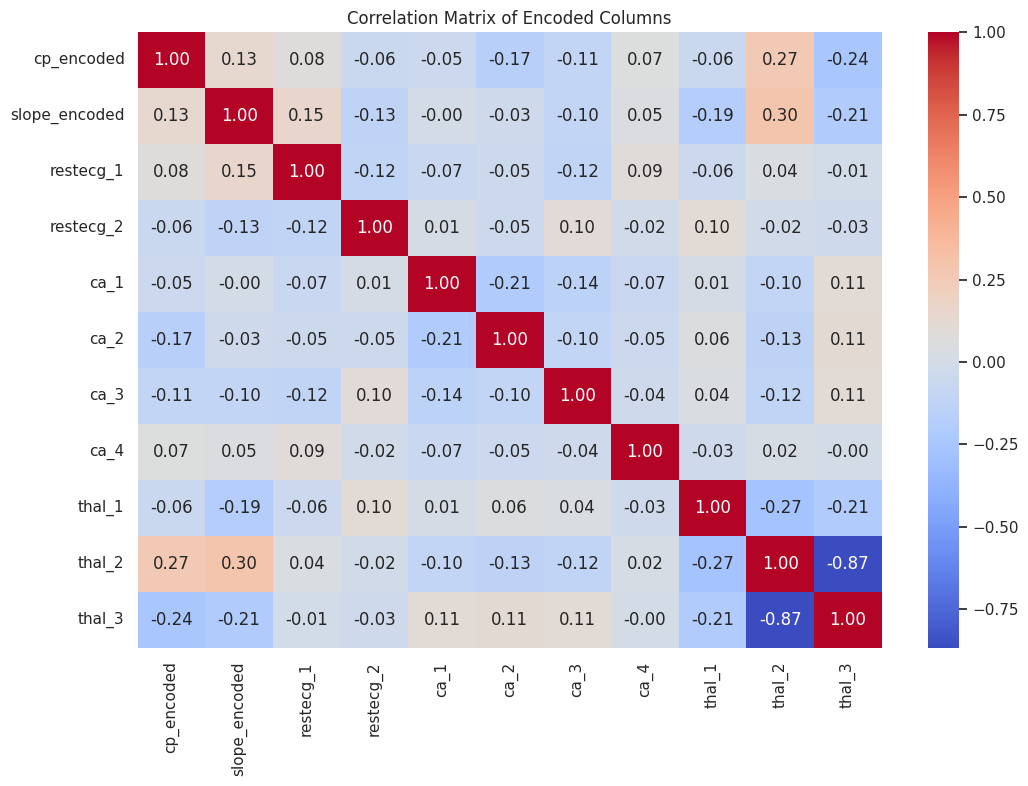

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df[encoded_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Encoded Columns")
plt.show()